In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons


In [57]:
import copy
import numpy as np
cclusters=[]
sclusters=[]

In [58]:
#import iris data
def import_dataset(X,Y):
    #iris = datasets.load_iris()
    X=X.tolist()
    Xn=[]
    for x in X:
        Xn.append([x])
    return (Xn,Y.tolist())

def single_linkage(ci, cj):
    dmin=100000000000000000
    for xi in ci:
        for xj in cj:
            dist = np.linalg.norm(np.array(xi)-np.array(xj))
            dmin=min(dmin,dist)
    return dmin
            
    

def complete_linkage(ci, cj):
    dmax=0
    for xi in ci:
        for xj in cj:
            dist = np.linalg.norm(np.array(xi)-np.array(xj))
            dmax=max(dmax,dist)
    return dmax


def merge(clusters,i,j):
    nclusters=[]
    for c in range(len(clusters)):
        if c!=i:
            
            if c==j:
                nclusters.append(clusters[i]+clusters[j])
            else:
                nclusters.append(clusters[c])
    return nclusters



#create distance matrix and merge
def calc_and_merge(cclusters,sclusters):
    n=len(cclusters)
    dist_complete=np.zeros((n,n))
    dist_single=np.zeros((n,n))
    dist_complete.fill(10000000000000)
    dist_single.fill(10000000000000)
    for i in range(n):
        for j in range(n):
            if i!=j:
                dist_complete[i][j]=complete_linkage(cclusters[i],cclusters[j])
                dist_single[i][j]=single_linkage(sclusters[i],sclusters[j])
    
    
    (ci,cj)=np.unravel_index(np.argmin(dist_complete),dist_complete.shape)
    (si,sj)=np.unravel_index(np.argmin(dist_single),dist_single.shape)
    
    #print (ci,cj),(si,sj) 
    cclusters=merge(cclusters, ci,cj)
    sclusters=merge(sclusters, si,sj)
    
    return (cclusters, sclusters)

    

Done


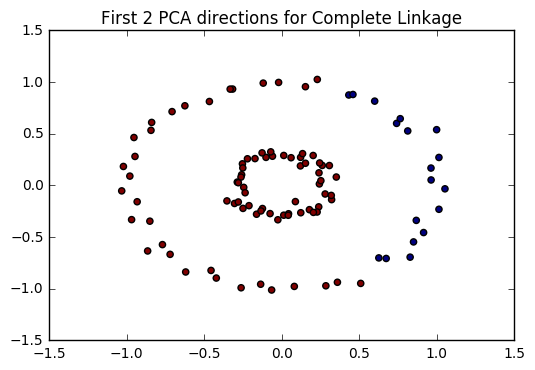

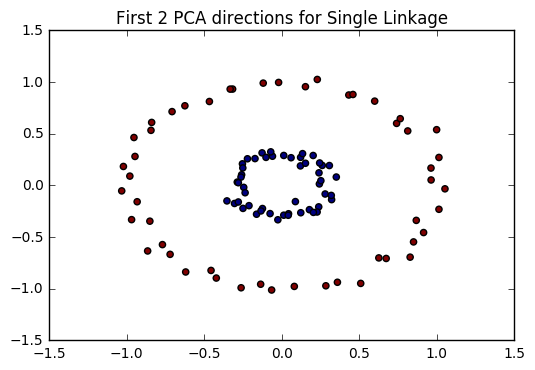

In [61]:
X,Y=make_circles(n_samples=100,factor=.3,noise=.04)
X,Y=import_dataset(X,Y)
numclusters=2
cclusters=copy.deepcopy(X)
sclusters=copy.deepcopy(X)
while(True):
    (cclusters, sclusters)=calc_and_merge(cclusters, sclusters)
    #print(len(cclusters))
    if len(cclusters)==numclusters:
        break
                
    #print(cclusters, sclusters)
print ("Done")

#Complete Linkage
X=[]
Y=[]
l=0
for cluster in cclusters:
    for x in cluster:
        X.append(x)
        Y.append(l)
        
    #print(l, len(cluster))
    l+=1
    
X=np.array(X)
Y=np.array(Y)

X_reduced = PCA(n_components=2).fit_transform(X)
plt.title("First 2 PCA directions for Complete Linkage")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.show()

#Single Linkage
X=[]
Y=[]
l=0
for cluster in sclusters:
    for x in cluster:
        X.append(x)
        Y.append(l)
        
    #print(l, len(cluster))
    l+=1
    
X=np.array(X)
Y=np.array(Y)


X_reduced = PCA(n_components=2).fit_transform(X)
plt.title("First 2 PCA directions for Single Linkage")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.show()

Done


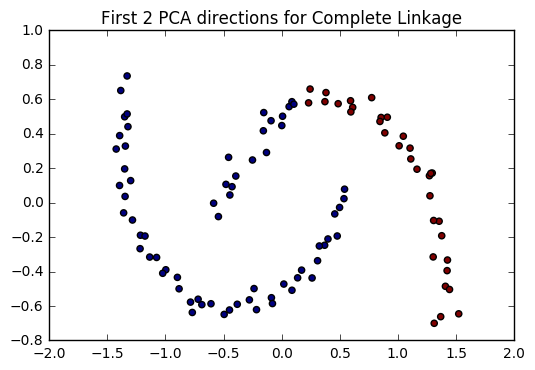

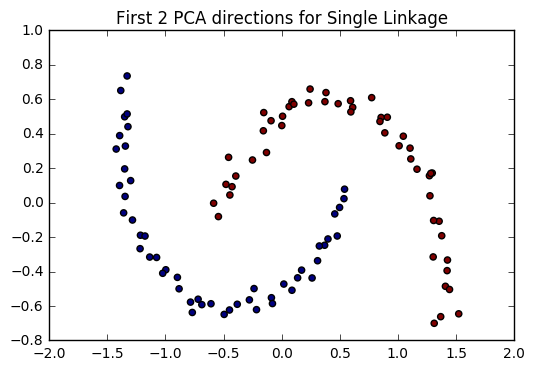

In [63]:
X,Y=make_moons(n_samples=100,noise=.04)
X,Y=import_dataset(X,Y)
numclusters=2
cclusters=copy.deepcopy(X)
sclusters=copy.deepcopy(X)
while(True):
    (cclusters, sclusters)=calc_and_merge(cclusters, sclusters)
    #print(len(cclusters))
    if len(cclusters)==numclusters:
        break
                
    #print(cclusters, sclusters)
print ("Done")

#Complete Linkage
X=[]
Y=[]
l=0
for cluster in cclusters:
    for x in cluster:
        X.append(x)
        Y.append(l)
        
    #print(l, len(cluster))
    l+=1
    
X=np.array(X)
Y=np.array(Y)

X_reduced = PCA(n_components=2).fit_transform(X)
plt.title("First 2 PCA directions for Complete Linkage")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.show()

#Single Linkage
X=[]
Y=[]
l=0
for cluster in sclusters:
    for x in cluster:
        X.append(x)
        Y.append(l)
        
    #print(l, len(cluster))
    l+=1
    
X=np.array(X)
Y=np.array(Y)


X_reduced = PCA(n_components=2).fit_transform(X)
plt.title("First 2 PCA directions for Single Linkage")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.show()